# üé¨ Netflix Exploratory Data Analysis (EDA)

## üìñ Einleitung
Dieses Projekt analysiert den **Netflix Movies and TV Shows Dataset** (Quelle: Kaggle).  
Ziel: Einblicke in die Verteilung von Filmen und Serien, Genres, L√§nder, Altersfreigaben und zeitliche Trends.  




In [71]:
##  Setup & Imports

# Basis-Stack
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re



# Plot-Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [72]:
# Daten laden und √úberblick verschaffen

df = pd.read_csv("netflix_titles.csv")

# √úberblick
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [73]:
# Data Cleaning

df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Dauer extrahieren
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract(r'([a-zA-Z]+)')


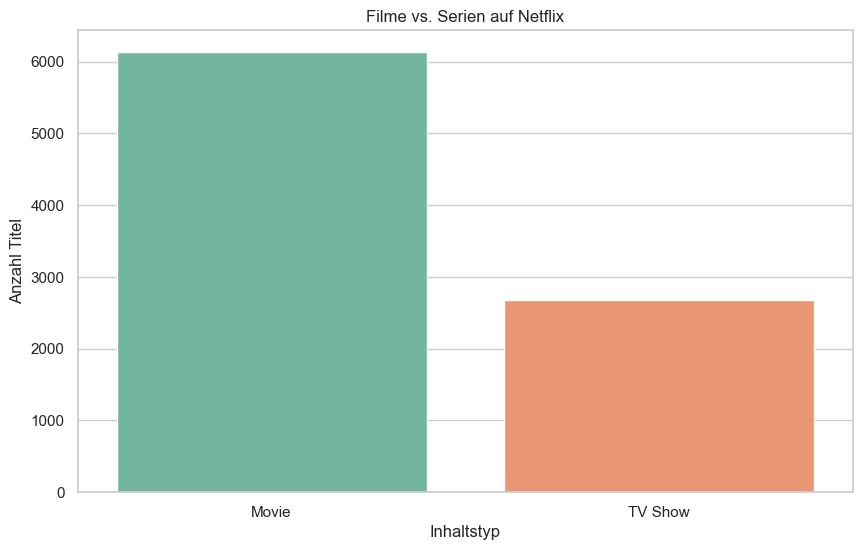

In [74]:
# Filme vs. Serien

sns.countplot(data=df, x="type", hue="type", legend=False, palette="Set2")
plt.title("Filme vs. Serien auf Netflix")
plt.xlabel("Inhaltstyp")
plt.ylabel("Anzahl Titel")
plt.show()


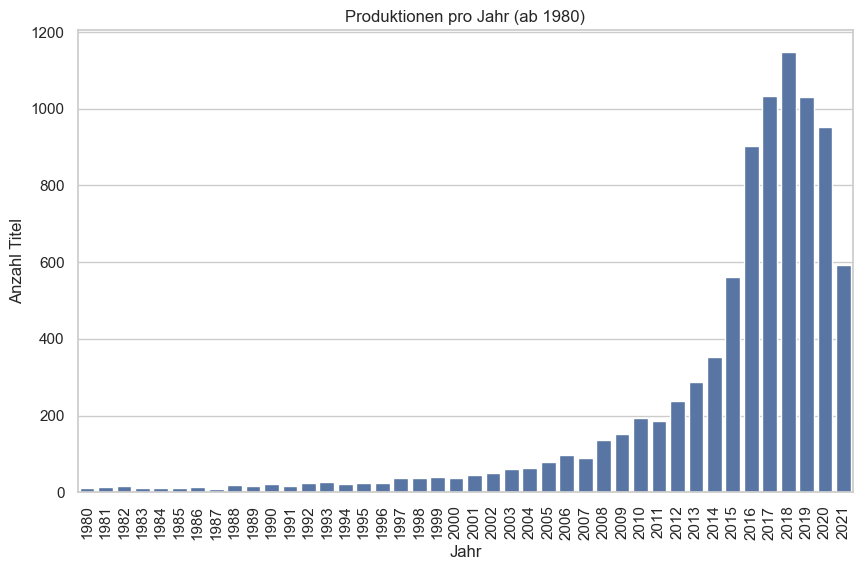

In [75]:
# Ver√∂ffentlichungen pro Jahr (ab 1980)

sns.countplot(data=df[df['release_year'] >= 1980], 
              x="release_year", 
              order=sorted(df[df['release_year'] >= 1980]['release_year'].unique()))
plt.xticks(rotation=90)
plt.title("Produktionen pro Jahr (ab 1980)")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Titel")
plt.show()


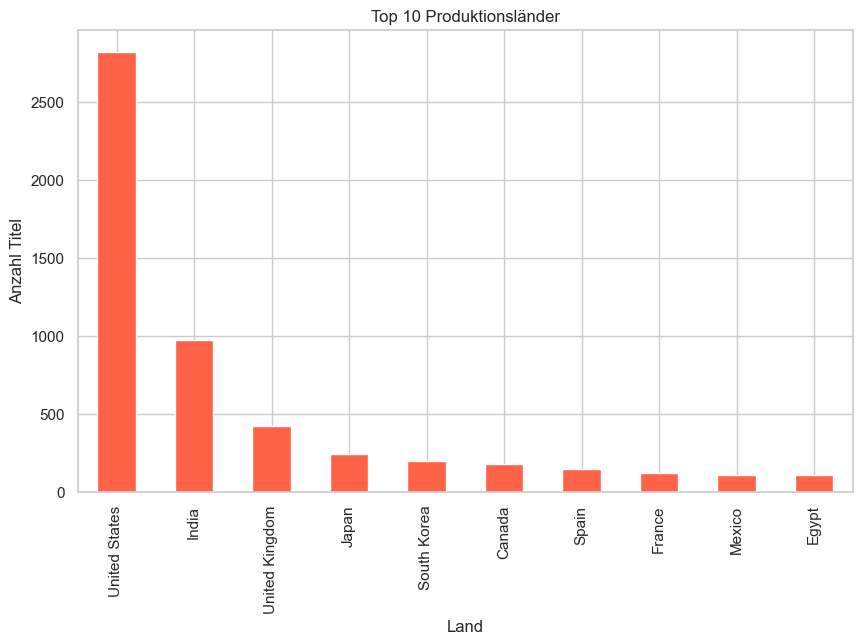

In [76]:
# Top 10 Produktionsl√§nder (ohne "Unknown")

top_countries = df[df['country'] != "Unknown"]['country'].value_counts().head(10)
top_countries.plot(kind='bar', color="tomato")
plt.title("Top 10 Produktionsl√§nder")
plt.xlabel("Land")
plt.ylabel("Anzahl Titel")
plt.show()


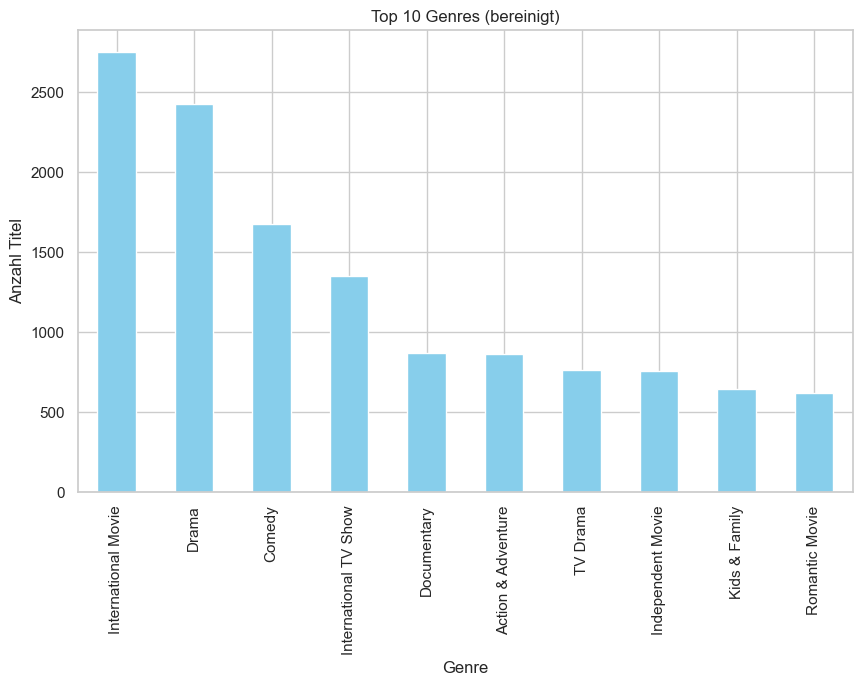

In [77]:
# Genres (Top 10)

def singularize(genre):
    genre = genre.strip()
    words = genre.split()  # Genre in W√∂rter zerlegen
    last = words[-1]       # nur das letzte Wort bearbeiten

    # Sonderf√§lle
    if last.lower() == "movies":
        last = "Movie"
    elif last.lower() == "shows":
        last = "Show"
    elif last.endswith("ies"):
        last = re.sub("ies$", "y", last)   # Comedies -> Comedy
    elif last.endswith("s") and not last.endswith("ss"):
        last = last[:-1]                   # Dramas -> Drama, Documentaries -> Documentary

    # zusammensetzen
    words[-1] = last
    return " ".join(words)

# Mapping f√ºr spezielle F√§lle
genre_map = {
    "Children & Family Movies": "Kids & Family",
    "International Dramas": "Drama (International)"
}

# Bereinigung anwenden
genres_clean = (
    df['listed_in']
    .str.split(',')
    .explode()
    .str.strip()
    .replace(genre_map)
    .apply(singularize)
)

# Top 10 Genres
top_genres = genres_clean.value_counts().head(10)

# Plot
top_genres.plot(kind='bar', color="skyblue")
plt.title("Top 10 Genres (bereinigt)")
plt.xlabel("Genre")
plt.ylabel("Anzahl Titel")
plt.show()




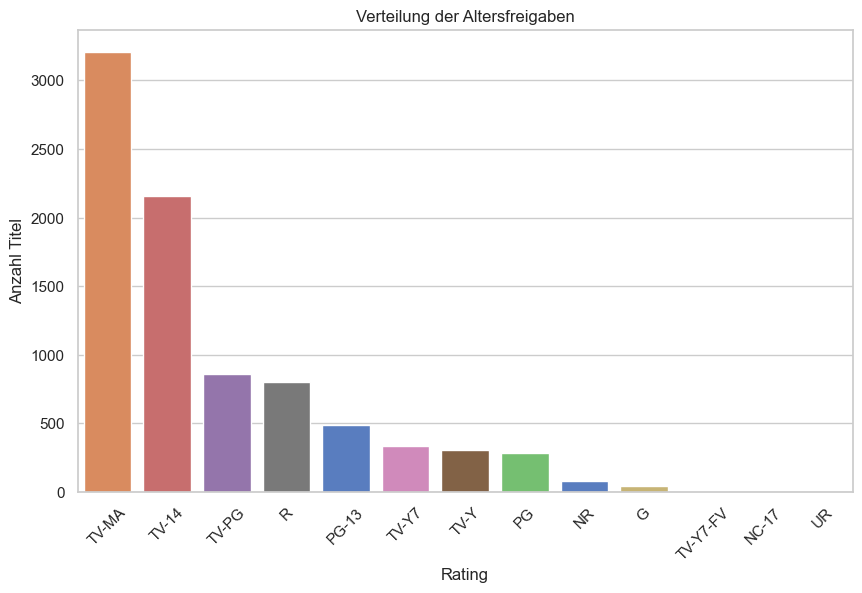

In [78]:
# Altersfreigaben (Ratings)

valid_ratings = ["TV-MA","TV-14","TV-PG","TV-Y","TV-Y7","TV-Y7-FV",
                 "PG","PG-13","R","G","NC-17","NR","UR"]

df_ratings = df[df['rating'].isin(valid_ratings)]

sns.countplot(data=df_ratings, x="rating", hue="rating", legend=False, 
              order=df_ratings['rating'].value_counts().index, palette="muted")
plt.xticks(rotation=45)
plt.title("Verteilung der Altersfreigaben")
plt.xlabel("Rating")
plt.ylabel("Anzahl Titel")
plt.show()


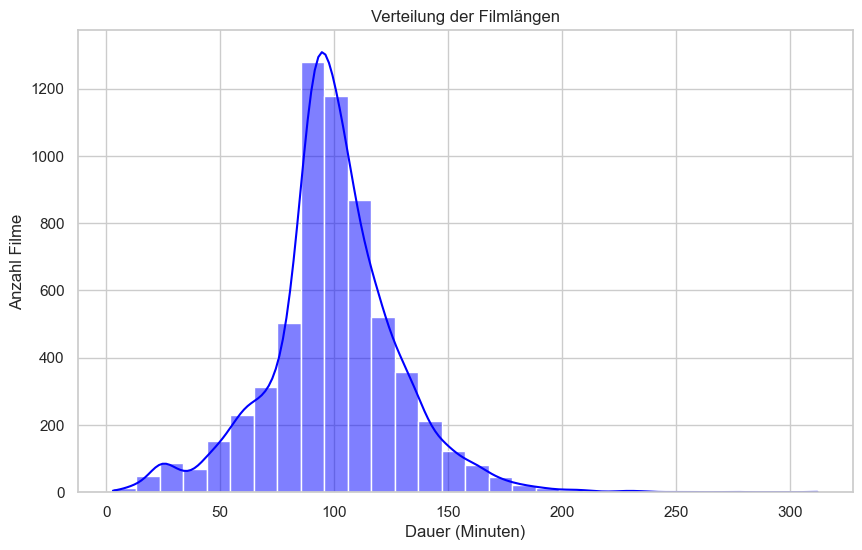

In [79]:
# Filml√§ngen (Minuten)

movies = df[df['type']=="Movie"].copy()
sns.histplot(movies['duration_num'], bins=30, kde=True, color="blue")
plt.title("Verteilung der Filml√§ngen")
plt.xlabel("Dauer (Minuten)")
plt.ylabel("Anzahl Filme")
plt.show()


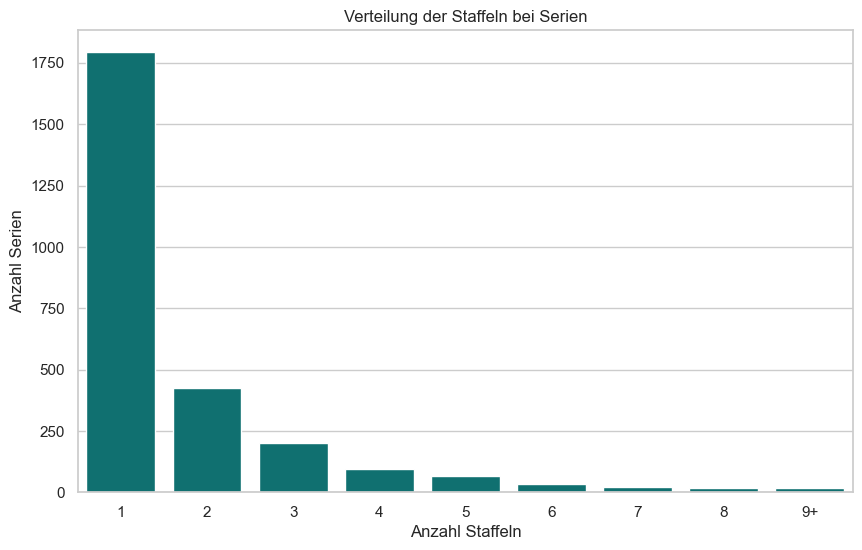

In [80]:
# Serien-Staffeln (mit 9+ Kategorie)

shows = df[df['type']=="TV Show"].copy()
shows['seasons_num'] = shows['duration'].str.extract(r'(\d+)').astype(float)
shows['seasons_limited'] = shows['seasons_num'].apply(lambda x: str(int(x)) if x <= 9 else "9+")
order = [str(i) for i in range(1, 9)] + ["9+"]

sns.countplot(data=shows, x="seasons_limited", order=order, color="teal")
plt.title("Verteilung der Staffeln bei Serien")
plt.xlabel("Anzahl Staffeln")
plt.ylabel("Anzahl Serien")
plt.show()


Fazit

Netflix hat ab 2015 massiv expandiert.

USA, Indien und UK dominieren die Produktionen.

Drama, Comedy und International Movies sind die Top-Genres.

TV-MA ist die h√§ufigste Altersfreigabe.

Filme liegen meist bei 80‚Äì120 Minuten, Serien haben √ºberwiegend 1‚Äì3 Staffeln.